### Kaggle: https://www.kaggle.com/code/mohamedtahaouf/enzyme-substrate-dataset-tree
# Enzyme Substrate Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#ML1">Feature selection.</a></li>
<li><a href="#ML2">Train'&'test split.</a></li>
<li><a href="#ML3">Model Selection.</a></li>
<li><a href="#ML4">EC1-Model Selection.</a></li>
<li><a href="#ML5">EC2-Model Selection.</a></li>
<li><a href="#ML6">Apply the selected model.</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Enzymes are known to act on molecules with structural similarities with their substrates. This behaviour is called promiscuity. Scientists working in drug discovery use this behaviour to target/design drugs to either block or promote biological actions. But, correct prediction of EC class(s) of substrates associated with enzymes has been a challenge in biology. Since there is no shortage of data, ML techniques can be employed to solve the aforementioned problem..
            

<a id='wrangling'></a>
## Data Wrangling


> In this section we will clear the unused data to can analyze it and answer the questions easily.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s3e18/train.csv')
df.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [4]:
df.duplicated().sum()

0

There are no duplicatin in this data.

In [5]:
df.isnull().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

There are no nulls in this data.

In [6]:
# Drop the unused data
df=df.drop(["id","EC3","EC4","EC5","EC6"],axis=1)

<a id='ML1'></a>
## Feature selection

In [7]:
x_ec1=df.drop(["EC2","EC1"],axis=1)
y_ec1=df["EC1"]

In [8]:
# Train a Gradient Boosting model
model = xgb.XGBClassifier()
model.fit(x_ec1, y_ec1)

# Get feature importance scores
importance_scores = model.feature_importances_

# Sort features based on importance scores
sorted_features = sorted(zip(importance_scores, x_ec1.columns), reverse=True)

# Select top features based on importance scores
k = 10
selected_features_ec1 = [feature for _, feature in sorted_features[:k]]
selected_features_ec1

['NumHeteroatoms',
 'EState_VSA2',
 'EState_VSA1',
 'SMR_VSA10',
 'PEOE_VSA14',
 'PEOE_VSA8',
 'Chi2v',
 'Chi2n',
 'Chi1v',
 'ExactMolWt']

<Axes: >

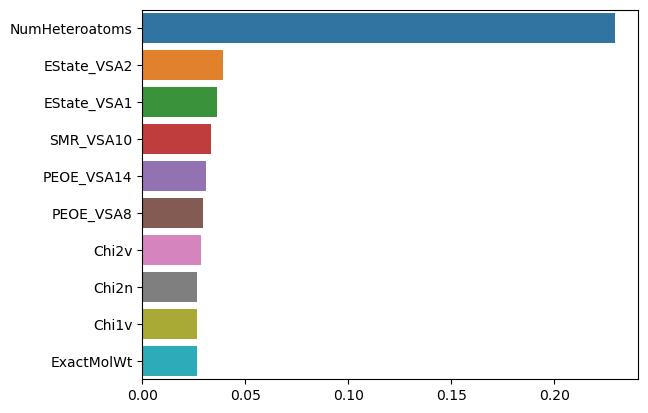

In [9]:
# use seaborn to visualize the importance of the features 
sns.barplot(x=[_ for _, feature in sorted_features[:k]],y=[feature for _, feature in sorted_features[:k]])

In [10]:
x3_ec2=df.drop(["EC2","EC1"],axis=1)
y3_ec2=df["EC2"]

In [11]:
# repeat the previous code for EC2
model = xgb.XGBClassifier()
model.fit(x3_ec2, y3_ec2)

importance_scores = model.feature_importances_

sorted_features = sorted(zip(importance_scores, x3_ec2.columns), reverse=True)

k = 10
selected_features_ec2 = [feature for _, feature in sorted_features[:k]]
selected_features_ec2

['fr_COO',
 'SlogP_VSA3',
 'Chi1v',
 'ExactMolWt',
 'Chi2v',
 'Chi3v',
 'Chi4n',
 'Chi1',
 'VSA_EState9',
 'PEOE_VSA14']

<Axes: >

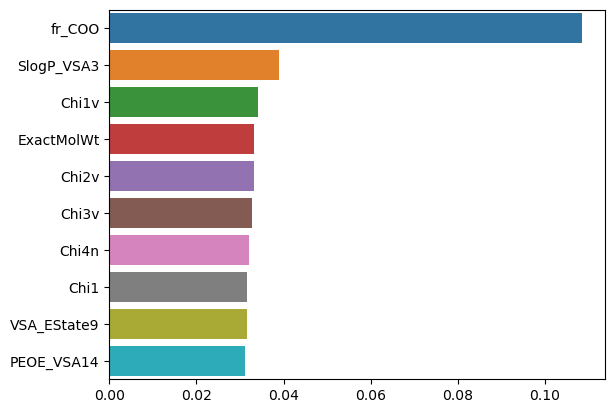

In [12]:
sns.barplot(x=[_ for _, feature in sorted_features[:k]],y=[feature for _, feature in sorted_features[:k]])


In [13]:
# apply the selected featsures
x1=df[selected_features_ec1].values
y1=df["EC1"].values

x2=df[selected_features_ec2].values 
y2=df["EC2"].values


<a id='ML2'></a>
## Train & test split


In [14]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=1)
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.3,random_state=1)

<a id='ML3'></a>
## Model Selection


In [15]:
# Use a function to apply the model easily
def model(model_name,x_train,y_train,x_test,y_test):
    model=model_name
    model.fit(x_train,y_train)
    pred_y=model.predict(x_test)
    score=roc_auc_score(y_test,pred_y)
    return score

<a id='ML4'></a>
#### EC1


In [16]:
# apply the aboce function on each model and get the result
print("KNeighborsClassifier for EC1",model(KNeighborsClassifier(),x1_train,y1_train,x1_test,y1_test))
print("XGBRegressor for EC1",model(XGBRegressor(),x1_train,y1_train,x1_test,y1_test))
print("LGBMClassifier for EC1",model(LGBMClassifier(),x1_train,y1_train,x1_test,y1_test))
print("GBC for EC1",model(GradientBoostingClassifier(),x1_train,y1_train,x1_test,y1_test))
print("CBC for EC1",model(CatBoostClassifier(verbose=False),x1_train,y1_train,x1_test,y1_test))

KNeighborsClassifier for EC1 0.5831359937335845
XGBRegressor for EC1 0.6529954457676683
LGBMClassifier for EC1 0.6117504039321219
GBC for EC1 0.6158782167364169
CBC for EC1 0.6094617356329033


The above result clarifies that the best result is in  GBC and then CBC so we figure out the hyperparameters to improve each one of them I will use a Gridsearch to find the best result but it will take time so I will appeal the result directly.

In [17]:
print("GBC for EC1",model(GradientBoostingClassifier(max_depth=4,subsample=.8,
min_samples_split=4,min_samples_leaf=5,max_leaf_nodes=2,validation_fraction=0.1),x1_train,y1_train,x1_test,y1_test))

GBC for EC1 0.6206883905096644


In [18]:
# Use the hyperparameter of XGBRegressor model
print("XGBRegressor for EC1",model(XGBRegressor(learning_rate=.1,max_depth=4,subsample=.8,
                                                gamma=.8,reg_alpha=.5),x1_train,y1_train,x1_test,y1_test))


XGBRegressor for EC1 0.6896443086900531


<a id='ML5'></a>

#### EC2

Repeat all the above to find EC2

In [19]:
# repeat the previous code
print("KNeighborsClassifier for EC2",model(KNeighborsClassifier(),x2_train,y2_train,x2_test,y2_test))
print("XGBRegressor for EC2",model(XGBRegressor(),x2_train,y2_train,x2_test,y2_test))
print("LGBMClassifier for EC2",model(LGBMClassifier(),x2_train,y2_train,x2_test,y2_test))
print("GBC for EC2",model(GradientBoostingClassifier(),x2_train,y2_train,x2_test,y2_test))

KNeighborsClassifier for EC2 0.5064743957756341
XGBRegressor for EC2 0.5496457614394135
LGBMClassifier for EC2 0.4991599846065523
GBC for EC2 0.5019670807335861


In [20]:
print("XGBRegressor for EC2",model(XGBRegressor(learning_rate=.08,max_depth= 5,colsample_bytree= 0.9),x2_train,y2_train,x2_test,y2_test))

XGBRegressor for EC2 0.57426486824092


As we see above the best result are extacted for GradientBoostingClassifier

<a id='ML6'></a>

## Model Selected

In [21]:
df_test=pd.read_csv("/kaggle/input/playground-series-s3e18/test.csv")

In [22]:
final_model_EC11=XGBRegressor(learning_rate=.1,max_depth=4,subsample=.8,gamma=.8,reg_alpha=.5)
final_model_EC11.fit(x1_train,y1_train)
pred_y_EC11=final_model_EC11.predict(x1_test)
score_EC11=roc_auc_score(y1_test,pred_y_EC11)
print("CatBoostRegressor Score for EC1",score_EC11)

final_model_EC22=XGBRegressor(learning_rate=.08,max_depth= 5,colsample_bytree= 0.9)
final_model_EC22.fit(x2_train,y2_train)
pred_y_EC22=final_model_EC22.predict(x2_test)
score_EC22=roc_auc_score(y2_test,pred_y_EC22)
print("CatBoostRegressor Score for EC2",score_EC22)

CatBoostRegressor Score for EC1 0.6896443086900531
CatBoostRegressor Score for EC2 0.57426486824092


In [23]:
x_df_test_EC11=df_test[selected_features_ec1].values
x_df_test_EC22=df_test[selected_features_ec2].values

In [24]:
probablity_EC11=final_model_EC11.predict(x_df_test_EC11)
probablity_EC22=final_model_EC22.predict(x_df_test_EC22)

In [25]:
pred=pd.DataFrame({'id':df_test['id'],'EC1':probablity_EC11,'EC2':probablity_EC22})
pred.head()

,id,EC1,EC2
0,14838,0.491012,0.780473
1,14839,0.780427,0.833498
2,14840,0.845874,0.707203
3,14841,0.712117,0.841624
4,14842,0.863009,0.803509


In [26]:
pred.to_csv("submission.csv",index=False)

In [27]:
!head submission.csv

id,EC1,EC2
14838,0.49101186,0.7804728
14839,0.7804274,0.83349776
14840,0.8458737,0.7072032
14841,0.71211666,0.8416238
14842,0.86300933,0.80350935
14843,0.5265552,0.7641775
14844,0.64112496,0.864455
14845,0.5733046,0.79665244
14846,0.6395086,0.7796072


<a id='conclusions'></a>
## Conclusion

* We try to get the best result using an appropriate model and the final result appeared that the best model we can use in this case is XGBRegressor after applying many hyperparameters we find out the best result in the test data are :
* around 69 % for EC1
* around 57 % for EC2